In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
laptop_data = pd.read_csv("dataset_laptop_scheme.csv")
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S #            6215 non-null   int64  
 1   Name           6215 non-null   object 
 2   Father Name    6215 non-null   object 
 3   Enrollment No  6213 non-null   object 
 4   Degree Title   6215 non-null   object 
 5   Department     6215 non-null   object 
 6   Year           25 non-null     float64
 7   Unnamed: 7     6190 non-null   float64
 8   Inter %        6215 non-null   float64
 9   CGPA           6215 non-null   float64
 10  Status         6215 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 534.2+ KB


##### here Unnamed: 7  column have some values of years 

## Cleaning data

In [14]:
# Replace missing values in 'year' with those from 'Unnamed: 7'
laptop_data["Year"] = laptop_data["Year"].fillna(laptop_data["Unnamed: 7"])
laptop_data.drop(columns="Unnamed: 7", inplace=True)     
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S #            6215 non-null   int64  
 1   Name           6215 non-null   object 
 2   Father Name    6215 non-null   object 
 3   Enrollment No  6213 non-null   object 
 4   Degree Title   6215 non-null   object 
 5   Department     6215 non-null   object 
 6   Year           6215 non-null   float64
 7   Inter %        6215 non-null   float64
 8   CGPA           6215 non-null   float64
 9   Status         6215 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 485.7+ KB


### How many Laptop will be distributed

In [56]:
Laptop_given = laptop_data[laptop_data["Status"] == "Selected"].value_counts().count()
print(f"There are {Laptop_given} are to be distributed")


There are 3064 are to be distributed


Number of selected students : 3064
Number of waiting students : 3151


Text(0.5, 1.0, 'Selected vs Waiting')

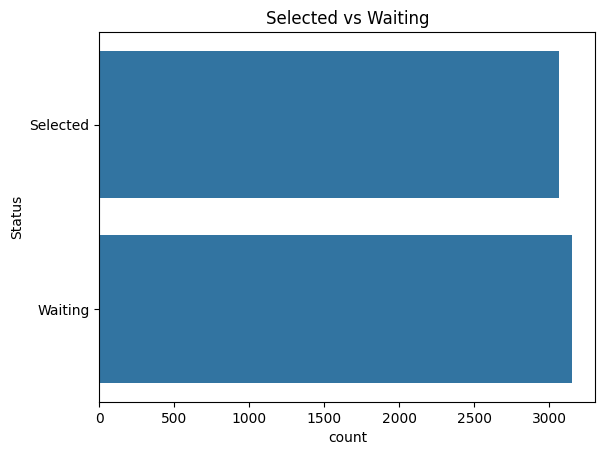

In [128]:
x =laptop_data["Status"] == "Selected"
x.value_counts()
print(f"Number of selected students : {x.value_counts().values[1]}\nNumber of waiting students : {x.value_counts().values[0]}")
sb.countplot(laptop_data["Status"])
plt.title("Selected vs Waiting")


#### top 10 dept with highest number of selected students

Text(0.5, 0, 'count')

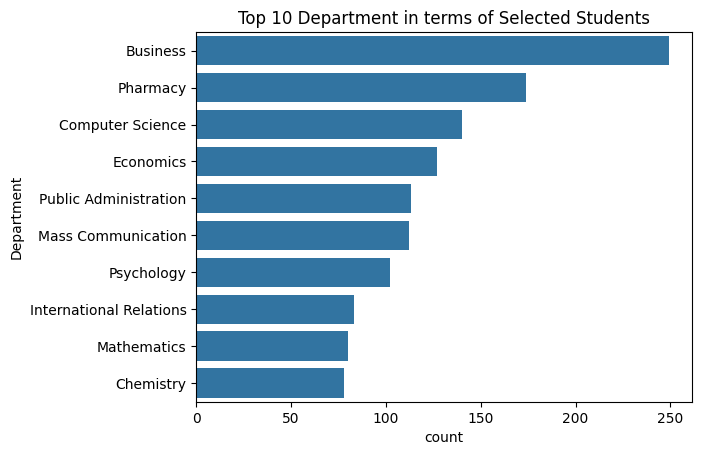

In [67]:
top_10_dept = laptop_data[(laptop_data["Status"]=="Selected")]["Department"].value_counts().head(10)
sb.barplot(x = top_10_dept.values , y = top_10_dept.index)
plt.title("Top 10 Department in terms of Selected Students")
plt.xlabel("count")

### Average CGPA of selected students

In [74]:
selected_students = laptop_data[(laptop_data["Status"]=="Selected")]
avg_cgpa =selected_students.CGPA.mean().round(2)
print(f"Average CGPA of Selected Students : {avg_cgpa}")

Average CGPA of Selected Students : 3.39


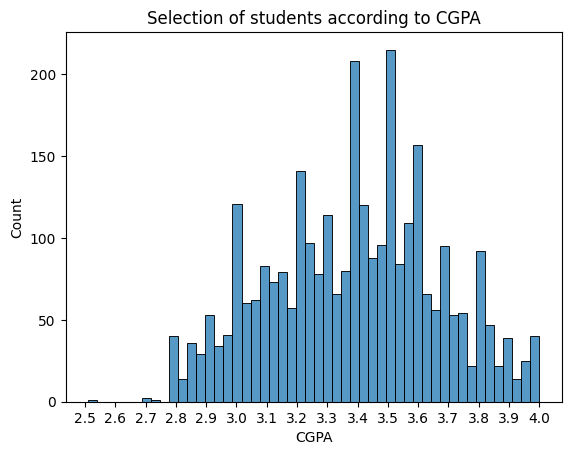

In [127]:
sb.histplot(selected_students.CGPA,bins=50)
plt.xticks(np.arange(2.5, 4.1, 0.1))
plt.title("Selection of students according to CGPA")
plt.show()

In [100]:
laptop_data.head()

,S #,Name,Father Name,Enrollment No,Degree Title,Department,Year,Inter %,CGPA,Status
0,1,Urooj Fatima,Muhammad ramzan a,SCI/NRC/KU-552,MS/ M.Phil,National Nematological Research,2.0,75.18,3.58,Selected
1,2,Bushra NAwab,Nawab Uddin,2023,PhD (5 years),National Nematological Research,2.0,57.50,3.58,Selected
2,3,Ghulam Yasin,Muhammad Bakhsh,SCI/RC12/KU-13,PhD (5 years),National Nematological Research,5.0,54.27,4.00,Selected
3,4,Atta Ullah,Inayat Ullah,SCI/NRC/KU-540,PhD (5 years),National Nematological Research,5.0,47.63,3.80,Selected
4,5,Zeeshan ali,Allah Rakhio chandio,B24126006123,BS (Hons),Zoology,1.0,96.36,3.85,Selected


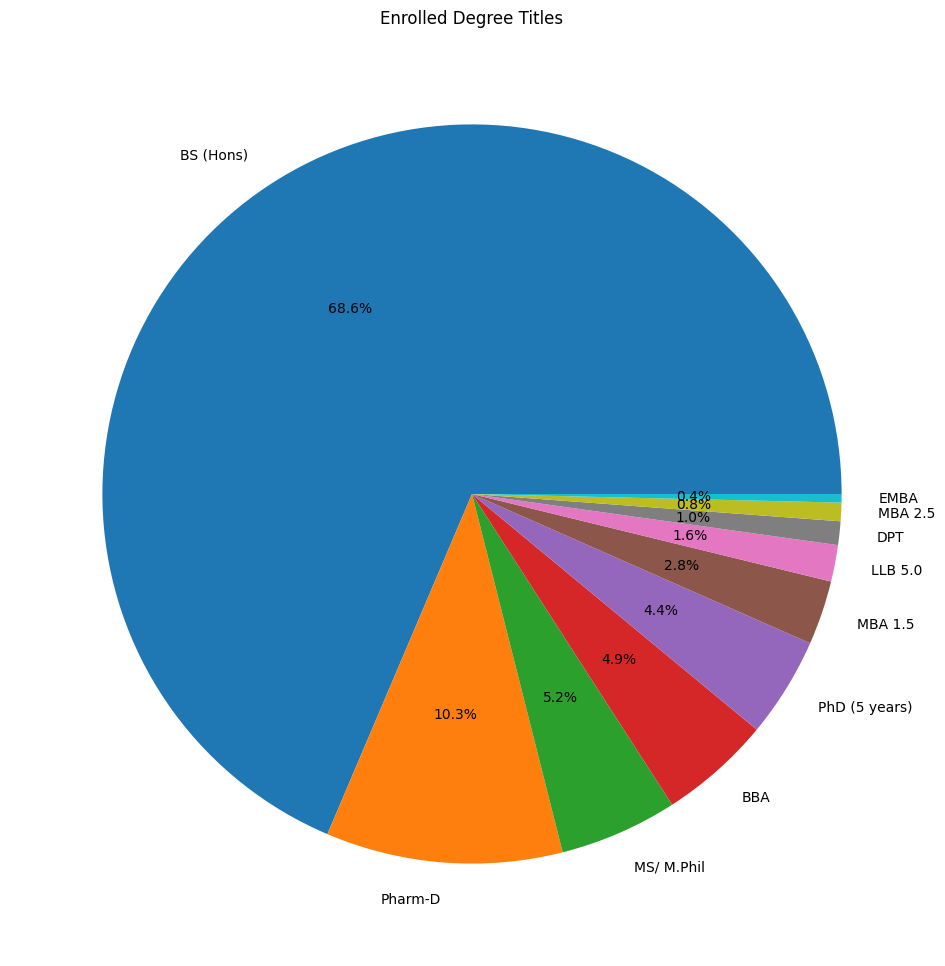

In [126]:
degree = laptop_data["Degree Title"].value_counts().head(10)
plt.figure(figsize=(12,12))
plt.pie(degree,labels=degree.index,autopct='%1.1f%%')
plt.title("Enrolled Degree Titles")
plt.show()

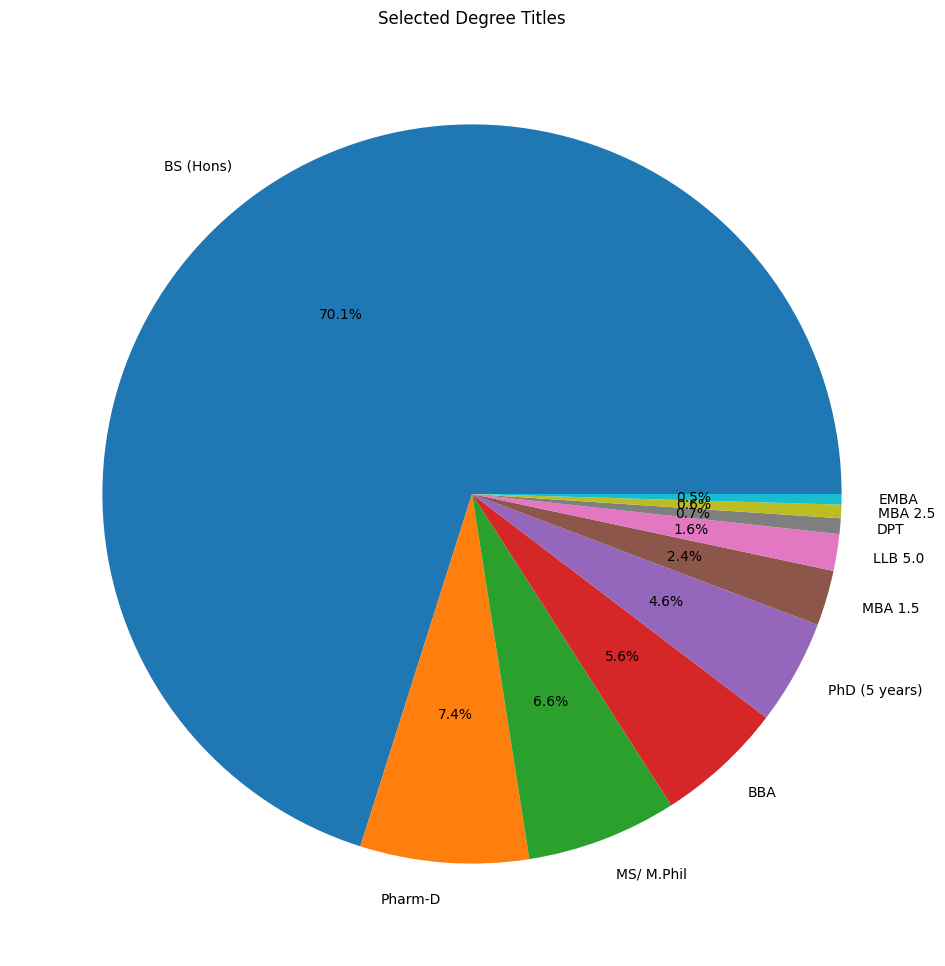

In [125]:
degree_selected = selected_students["Degree Title"].value_counts().head(10)
plt.figure(figsize=(12,12))
plt.pie(degree_selected,labels=degree.index,autopct='%1.1f%%')
plt.title("Selected Degree Titles")
plt.show()